### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import timeit
import warnings
import string
import seaborn as sn
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
import emoji
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tkinter import ttk
from tkinter import *

In [2]:
from gensim.models import FastText

In [3]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### Preprocessing the Text

In [4]:
def preprocessing(text):
    #text = re.sub("[^a-zA-Z]", " ",text)
    #text = re.sub("[0-9]", " ",text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = text.lower()
    text = (re.sub(' +',' ',text)).strip()
    text = emoji.get_emoji_regexp().sub("", text)
    return text

In [5]:
def backto(arr):
    A=[]
    for i in arr:
        A.append(np.argmax(i))
    return A

In [6]:
def evaluation_metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred) # Accuracy of prediction
    conf_mat = confusion_matrix(y_test, y_pred) # Confusion matrix
    precision = precision_score(y_test, y_pred, average='macro') # Precision
    recall = recall_score(y_test, y_pred, average='macro') # Recall
    f1 = f1_score(y_test, y_pred, average='macro') # F1-score
    evaluation = [accuracy, conf_mat, precision, recall, f1]
    return evaluation

In [7]:
def categorical_vals(df_col):
    A=[]
    for i in df_col:
        t = [0]*max(np.unique(df_col)+1)
        t[i]=1
        A.append(t)
    return A
    

In [8]:
categorical_vals([1,2])

[[0, 1, 0], [0, 0, 1]]

In [9]:
def load_text(path, n, label):
  x = []
  T = ""
  with open(str(path),encoding="utf8") as f:
    lines = f.readlines()
    for e in lines:
      T = T + e
  x.append(T)
  L = np.zeros(len(x))
  if(label == 1):
    L = np.ones(len(x))
  return x

def load_len(path, n, label):
  x = []
  T = ""
  with open(str(path),encoding="utf8") as f:
    lines = f.readlines()
    for e in lines:
      T = T + e
  x.append(T)
  L = np.zeros(len(x))
  if(label == 1):
    L = np.ones(len(x))
  return L

In [10]:
import os
p = 'D:/Co/Sem7/Prj/MiniProj/Dataset/TEST/'
N = [9, 9]
L = [0, 1]

In [11]:
ffiles = []

for root, dirs, files in os.walk(p):
    for file in files:
        # check if the file name contains the word 'hello'
        # add the file name to the list
        ffiles.append(file)
            
print(ffiles)

['Abusive-1.txt', 'Abusive-11.txt', 'Abusive-14.txt', 'Abusive-19.txt', 'Abusive-23.txt', 'Abusive-28.txt', 'Abusive-35.txt', 'Abusive-6.txt', 'Abusive-8.txt', 'Non-Abusive-1.txt', 'Non-Abusive-11.txt', 'Non-Abusive-13.txt', 'Non-Abusive-19.txt', 'Non-Abusive-23.txt', 'Non-Abusive-28.txt', 'Non-Abusive-32.txt', 'Non-Abusive-5.txt', 'Non-Abusive-8.txt']


In [12]:
str(p)

'D:/Co/Sem7/Prj/MiniProj/Dataset/TEST/'

In [13]:
from pathlib import WindowsPath

#fflies = [p + element  for element in ffiles]
print(ffiles)

['Abusive-1.txt', 'Abusive-11.txt', 'Abusive-14.txt', 'Abusive-19.txt', 'Abusive-23.txt', 'Abusive-28.txt', 'Abusive-35.txt', 'Abusive-6.txt', 'Abusive-8.txt', 'Non-Abusive-1.txt', 'Non-Abusive-11.txt', 'Non-Abusive-13.txt', 'Non-Abusive-19.txt', 'Non-Abusive-23.txt', 'Non-Abusive-28.txt', 'Non-Abusive-32.txt', 'Non-Abusive-5.txt', 'Non-Abusive-8.txt']


In [14]:
from pathlib import Path

Text_ab = []
Text_nab = []
Lbl_ab = []
Lbl_nab = []

for i in range(9):
    Text_ab.append((load_text( p + ffiles[i] ,N[0], 0)))
    Lbl_ab.append(load_len( p + ffiles[i] ,N[0], 0))
    Text_nab.append(load_text( p + ffiles[i+9] ,N[1], 1))
    Lbl_nab.append(load_len( p + ffiles[i+9] ,N[1], 1))

In [15]:
Text_ab

[['அஞ்சு வருஷம் உங்க பவர் காமிச்சீங்களே என்ன ஆட்டம் போட்டீங்க எடிமகே  சுண்ணிக்கே எங்க தளபதி அத தடுக்கத்தாண்டா வராரு அவுர மட்டும் அழிக்கணும்னு நினைச்ச முடியவே முடியாது நீ அதுக்கு தகுதியே கிடையாது எடிமகே ஒ சுண்ணிக்கே ஒ நீ அதுக்கு தகுதியே கிடையாது என் தளபதி தான் இந்த நாட்டையே இந்த நாட்டையே நல்லவிதமா மாத்துறது எங்க தளபதி மட்டும்தான் நீ அந்த அஞ்சு வருஷம் என்ன பண்ணமுடியும் இந்த மக்களுக்காக இந்த மக்கள் என்ன பண்ணப்போறாய்ங்க அந்த தைரியத்தில தானே நீக்க இப்படி ஆடுறிங்க இந்த சர்க்கார் படம் வந்ததுல தாண்ட தெரியுது உங்க ஊழல் புண்ட என்னடா புண்டைகளா சிரிப்புத்தாண்டா வருது உங்கள பாத்த உங்களப்பத்தி பேசுனாலே சிரிப்பு புண்ட தாண்ட வருது கோவா புண்டைய வருது ஜோக்கர் புண்டடா நீங்கல்லாம் இப்படி பேசுறாங்களே அவமான புண்டையா இல்லையா     '],
 ['... கிட்ட பசங்க கவனமா இருக்கனும். ஒரு கட்டத்துல டீசென்ட் ஆஹ் விலகி போகாம, பெரிய சண்டை ஆஹ் போடு கெளம்பனும் னு நெனச்சீங்கனா. இந்த எஸ்பிஎரிஎன்ஸ் ஆனா ஆண்ட்டிங்க உங்க வாழ்க்கை ஆஹ் வே காலி பன்னிடுவாங்க. நீங்க வேல பண்ற எடத்துல கண்ட படி மெயில் அனுப்புறது தொடங்கி, உங்க பேமிலி ரெளடிவ்ஸ்

In [16]:
Lbl_nab

[array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.])]

In [17]:
Text = Text_nab + Text_ab
Lbl = np.concatenate((Lbl_nab, Lbl_ab), axis = 0)
len(Text), len(Lbl)

(18, 18)

In [18]:
Lbl

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [19]:
df = pd.DataFrame(data=[Text, Lbl], index=["text", "label"]).T

In [20]:
df.shape

(18, 2)

In [21]:
df.to_csv('prj_test.csv') 

In [22]:
import os
p = 'D:/Co/Sem7/Prj/MiniProj/Dataset/TRAIN/'
N = [32, 38]
L = [0, 1]

In [23]:
ffiles = []

for root, dirs, files in os.walk(p):
    for file in files:
        # check if the file name contains the word 'hello'
        # add the file name to the list
        ffiles.append(file)
            
print(ffiles)

['Abusive-10.txt', 'Abusive-12.txt', 'Abusive-13.txt', 'Abusive-15.txt', 'Abusive-16.txt', 'Abusive-17.txt', 'Abusive-18.txt', 'Abusive-2.txt', 'Abusive-20.txt', 'Abusive-21.txt', 'Abusive-22.txt', 'Abusive-24.txt', 'Abusive-25.txt', 'Abusive-26.txt', 'Abusive-27.txt', 'Abusive-29.txt', 'Abusive-3.txt', 'Abusive-30.txt', 'Abusive-31.txt', 'Abusive-32.txt', 'Abusive-33.txt', 'Abusive-34.txt', 'Abusive-36.txt', 'Abusive-37.txt', 'Abusive-38.txt', 'Abusive-39.txt', 'Abusive-4.txt', 'Abusive-40.txt', 'Abusive-41.txt', 'Abusive-42.txt', 'Abusive-43.txt', 'Abusive-44.txt', 'Abusive-45.txt', 'Abusive-46.txt', 'Abusive-47.txt', 'Abusive-5.txt', 'Abusive-7.txt', 'Abusive-9.txt', 'Non-Abusive-10.txt', 'Non-Abusive-12.txt', 'Non-Abusive-14.txt', 'Non-Abusive-15.txt', 'Non-Abusive-16.txt', 'Non-Abusive-17.txt', 'Non-Abusive-18.txt', 'Non-Abusive-2.txt', 'Non-Abusive-20.txt', 'Non-Abusive-21.txt', 'Non-Abusive-22.txt', 'Non-Abusive-24.txt', 'Non-Abusive-25.txt', 'Non-Abusive-26.txt', 'Non-Abusive-2

In [24]:
str(p)

'D:/Co/Sem7/Prj/MiniProj/Dataset/TRAIN/'

In [25]:
from pathlib import WindowsPath

#fflies = [p + element  for element in ffiles]
print(ffiles)

['Abusive-10.txt', 'Abusive-12.txt', 'Abusive-13.txt', 'Abusive-15.txt', 'Abusive-16.txt', 'Abusive-17.txt', 'Abusive-18.txt', 'Abusive-2.txt', 'Abusive-20.txt', 'Abusive-21.txt', 'Abusive-22.txt', 'Abusive-24.txt', 'Abusive-25.txt', 'Abusive-26.txt', 'Abusive-27.txt', 'Abusive-29.txt', 'Abusive-3.txt', 'Abusive-30.txt', 'Abusive-31.txt', 'Abusive-32.txt', 'Abusive-33.txt', 'Abusive-34.txt', 'Abusive-36.txt', 'Abusive-37.txt', 'Abusive-38.txt', 'Abusive-39.txt', 'Abusive-4.txt', 'Abusive-40.txt', 'Abusive-41.txt', 'Abusive-42.txt', 'Abusive-43.txt', 'Abusive-44.txt', 'Abusive-45.txt', 'Abusive-46.txt', 'Abusive-47.txt', 'Abusive-5.txt', 'Abusive-7.txt', 'Abusive-9.txt', 'Non-Abusive-10.txt', 'Non-Abusive-12.txt', 'Non-Abusive-14.txt', 'Non-Abusive-15.txt', 'Non-Abusive-16.txt', 'Non-Abusive-17.txt', 'Non-Abusive-18.txt', 'Non-Abusive-2.txt', 'Non-Abusive-20.txt', 'Non-Abusive-21.txt', 'Non-Abusive-22.txt', 'Non-Abusive-24.txt', 'Non-Abusive-25.txt', 'Non-Abusive-26.txt', 'Non-Abusive-2

In [26]:
from pathlib import Path

Text_ab = []
Text_nab = []
Lbl_ab = []
Lbl_nab = []

for i in range(32):
    Text_ab.append((load_text( p + ffiles[i] ,N[0], 0)))
    Lbl_ab.append(load_len( p + ffiles[i] ,N[0], 0))
    
for j in range(32,70):
    Text_nab.append(load_text( p + ffiles[j] ,N[1], 1))
    Lbl_nab.append(load_len( p + ffiles[j] ,N[1], 1))

In [27]:
Text = Text_nab + Text_ab
Lbl = np.concatenate((Lbl_nab, Lbl_ab), axis = 0)
len(Text), len(Lbl)

(70, 70)

In [28]:
df = pd.DataFrame(data=[Text, Lbl], index=["text", "label"]).T

In [29]:
df.shape

(70, 2)

In [30]:
df.to_csv('prj_train.csv') 

Loading the dataset

In [31]:
df_train = pd.read_csv(".\prj_train.csv")
df_dev = pd.read_csv(".\prj_test.csv")

In [32]:
n_classes = 2

n_classes

2

In [33]:
le = LabelEncoder()

In [34]:
#X_train = np.array([(preprocessing(i)).split() for i in df_train["comments"]])
#X_val = np.array([(preprocessing(i)).split() for i in df_dev["comments"]])
X_train = [(preprocessing(i)) for i in df_train["text"]]
X_val = [(preprocessing(i)) for i in df_dev["text"]]

Y_train = le.fit_transform(np.array(df_train["label"]))
Y_val = le.fit_transform(np.array(df_dev["label"]))

In [35]:
Y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [36]:
Y_val

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(array([32., 38.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

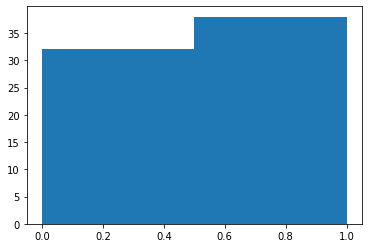

In [37]:
plt.hist(Y_train,bins=n_classes)

In [38]:
df = pd.DataFrame(X_train,columns=["text"])

In [39]:
df.head()

,text
0,['இது என்ன இன்று முளைத்த சொல்லலா இல்லை நூற்றாண...
1,['ஓல் மிகச்சாதாரணமாக வருவது கிடையாது. சில சந்த...
2,['இப்படி வகை துணை இல்லாமல் ஓல் போடும் நண்பனுக்...
3,['இதுல வந்து என்னப்பதி தப்ப பேசுறது இதெல்லாம் ...
4,"['மச்சி பிரசன்னா எப்டி மச்சி, அவன் ஆ தூ, மயிரு..."


In [40]:
df["labels"] = categorical_vals(le.transform(df_train["label"]))
df.head()

,text,labels
0,['இது என்ன இன்று முளைத்த சொல்லலா இல்லை நூற்றாண...,"[0, 1]"
1,['ஓல் மிகச்சாதாரணமாக வருவது கிடையாது. சில சந்த...,"[0, 1]"
2,['இப்படி வகை துணை இல்லாமல் ஓல் போடும் நண்பனுக்...,"[0, 1]"
3,['இதுல வந்து என்னப்பதி தப்ப பேசுறது இதெல்லாம் ...,"[0, 1]"
4,"['மச்சி பிரசன்னா எப்டி மச்சி, அவன் ஆ தூ, மயிரு...","[0, 1]"


df["class"],df["comments"] = df["comments"],df["class"]

In [41]:
df.tail()

,text,labels
65,['கார்பொரேட் கல்ச்சர் ரெண்டு டன் லடோம் அதே தாங...,"[1, 0]"
66,['என்ன பாதுகா ஒரு பொண்ணு வேணுமா இல்லையா இந்த ந...,"[1, 0]"
67,['இவங்க பெத்தவங்க பெத்தவங்க னு சொல்றாங்களே நண்...,"[1, 0]"
68,['இப்படி கண்ட கண்ட பாடலை அட்வைஸ் பண்ணாலும் கடை...,"[1, 0]"
69,['நாம் அனைவரும் வாழ்த்த பிறந்தவர்கள் வாழ்க்கைய...,"[1, 0]"


In [42]:
eval_frame = pd.DataFrame(X_val,columns=["text"]) 
eval_frame['labels'] = categorical_vals(le.transform(df_dev["label"]))
print(eval_frame.head())

                                                text  labels
0  ['இப்போ ரிசெண்டஹ் சென்னைல ஒரு பர்டிகுலர் கடைக்...  [0, 1]
1  ['நல்லதா? நாலு விஷயம் ஒன்று ஒப்ழ் இல் இருக்கிற...  [0, 1]
2  ['தமிழ்நாட்டில் மட்டுமே தோராயமாக நானூற்றி. அறு...  [0, 1]
3  ['லஸ்ட் ஒரு மூன்று மாசத்துல நான் கேள்விப்பட்டே...  [0, 1]
4  ['பூமி உடைய தென் துருவத்தில் சூரியன் உதிக்கிறத...  [0, 1]


Model 1

In [43]:
from simpletransformers.classification import MultiLabelClassificationModel
# set use_cuda=False on CPU-only platforms
model = MultiLabelClassificationModel('bert', 'monsoon-nlp/tamillion', num_labels= 2, use_cuda=False,
                            args={ 'reprocess_input_data': True, 'use_cached_eval_features': False, 'overwrite_output_dir': True, 'num_train_epochs': 20,})
model.train_model(df,eval_data=eval_frame)
print("trained model")

You are using a model of type electra to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at monsoon-nlp/tamillion were not used when initializing BertForMultiLabelSequenceClassification: ['electra.encoder.layer.8.attention.output.LayerNorm.bias', 'electra.encoder.layer.3.attention.self.key.bias', 'electra.encoder.layer.3.attention.self.key.weight', 'electra.encoder.layer.5.intermediate.dense.bias', 'electra.encoder.layer.5.attention.self.key.bias', 'electra.encoder.layer.5.attention.output.LayerNorm.bias', 'electra.encoder.layer.1.attention.self.query.weight', 'electra.encoder.layer.4.attention.output.LayerNorm.bias', 'electra.encoder.layer.7.attention.self.value.bias', 'electra.encoder.layer.6.output.LayerNorm.weight', 'electra.encoder.layer.1.intermediate.dense.bias', 'electra.encoder.layer.7.output.dense.bias', 'electra.encoder.layer.0.attention.self.query.bias', 'electra.encoder.laye

trained model


In [44]:
result, model_outputs, wrong_predictions = model.eval_model(eval_frame)

Running Evaluation: 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]


In [45]:
wrong_predictions

[]

In [46]:
preds = model.predict(X_val)

100%|██████████| 3/3 [00:06<00:00,  2.02s/it]


In [47]:
print(classification_report(backto(preds[0]),Y_val))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



Model 2

In [48]:
from simpletransformers.classification import MultiLabelClassificationModel
# set use_cuda=False on CPU-only platforms
model = MultiLabelClassificationModel('bert', 'google/muril-base-cased', num_labels= 2, use_cuda=False,
                            args={ 'reprocess_input_data': True, 'use_cached_eval_features': False, 'overwrite_output_dir': True, 'num_train_epochs': 20,})
model.train_model(df,eval_data=eval_frame)
print("trained model")

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMult

trained model


In [49]:
result, model_outputs, wrong_predictions = model.eval_model(eval_frame)

Running Evaluation: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


In [50]:
wrong_predictions

[]

In [51]:
preds = model.predict(X_val)

100%|██████████| 3/3 [00:02<00:00,  1.20it/s]


In [52]:
print(classification_report(backto(preds[0]),Y_val))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.75      0.86        12

    accuracy                           0.83        18
   macro avg       0.83      0.88      0.83        18
weighted avg       0.89      0.83      0.84        18

